<h1><i>Package fanalysis</i></h1>
<h2>Analyse Factorielle des Correspondances</h2>
<p>
Ce tutoriel a pour objectif de présenter rapidement les principales fonctionnalités offertes par le package <i>fanalysis</i> pour réaliser une Analyse Factorielle des Correspondances.<br />
Il suppose connu les soubassements théoriques de cette méthode.<br />
Il ne s'attarde pas non plus sur l'interprétation du jeu de données, qui n'a pour but que de présenter les fonctionnalités du package.<br />
</p>



<p>
L'AFC a ici pour but de décrire un fichier de données.<br />
<br />
http://eric.univ-lyon2.fr/%7Ericco/tanagra/fichiers/media_prof_afc.xls <br />
</p>
<p>
Les données sont transformées en matrice de type numpy.ndarray.
</p>
<p>
Les données doivent se présenter sous forme de tableau croisé, avec des fréquences absolues (effectifs de chaque cellule).
</p>

In [1]:
pip install fanalysis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from fanalysis.ca import CA


In [3]:
df =pd.read_excel("media_prof_afc.xls")
df

,Prof,Radio,Tel.,Quot.Nat.,Quot.Reg.,Press.Mag.,Press.TV
0,Agriculteur,96,118,2,71,50,17
1,Petit.Patr.,122,136,11,76,49,41
2,Prof.Cad.Sup,193,184,74,63,103,79
3,Prof.Int.,360,365,63,145,141,184
4,Employe,511,593,57,217,172,306
5,Ouvr.Qualif.,385,457,42,174,104,220
6,Ouvr.Non-Qual.,156,185,8,69,42,85
7,Inactif,1474,1931,181,852,642,782


In [4]:
df = df.set_index("Prof")

In [5]:
print(df)

                Radio  Tel.  Quot.Nat.  Quot.Reg.  Press.Mag.  Press.TV
Prof                                                                   
Agriculteur        96   118          2         71          50        17
Petit.Patr.       122   136         11         76          49        41
Prof.Cad.Sup      193   184         74         63         103        79
Prof.Int.         360   365         63        145         141       184
Employe           511   593         57        217         172       306
Ouvr.Qualif.      385   457         42        174         104       220
Ouvr.Non-Qual.    156   185          8         69          42        85
Inactif          1474  1931        181        852         642       782


In [6]:
# transformer le tableau en matrice
X = df.values

On crée une instance de la classe CA, en lui passant ici des étiquettes pour les lignes et les colonnes. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

In [7]:
X

array([[  96,  118,    2,   71,   50,   17],
       [ 122,  136,   11,   76,   49,   41],
       [ 193,  184,   74,   63,  103,   79],
       [ 360,  365,   63,  145,  141,  184],
       [ 511,  593,   57,  217,  172,  306],
       [ 385,  457,   42,  174,  104,  220],
       [ 156,  185,    8,   69,   42,   85],
       [1474, 1931,  181,  852,  642,  782]], dtype=int64)

Analyse des Correspondances (AC)
    
Cette classe hérite de la classe Base.
    
CA effectue une analyse des correspondances, étant donné un tableau de contingence contenant des fréquences absolues ; 

shape= n_rows x n_columns. Cette implémentation ne fonctionne que pour les tableaux denses.


### Paramètres : 

- n_components : int, float ou None
        Nombre de composants à conserver.
   - Si n_components vaut None, conservez tous les composants.
   - Si 0 <= n_components < 1, sélectionnez le nombre de composants tel que le montant de la variance à expliquer soit supérieur au pourcentage spécifié par n_components.
   - Si 1 <= n_composants :
        - Si n_components est un entier, sélectionnez un nombre de composants égal à n_components.
        - Si n_components est flottant, sélectionnez le plus grand nombre de composants inférieur à n_components.
        
- row_labels : tableau de chaînes ou Aucun
    - Si row_labels est un tableau de chaînes : ce tableau fournit les étiquettes de ligne.
         - Si la forme du tableau ne correspond pas au nombre de lignes : les étiquettes sont automatiquement calculées pour chaque ligne.
         - Si row_labels vaut None : les labels sont automatiquement calculés pour chaque ligne.

- col_labels : tableau de chaînes ou Aucun
     - Si col_labels est un tableau de chaînes : ce tableau fournit les étiquettes de colonne. Si la forme du tableau ne correspond pas au nombre de colonnes : les étiquettes sont automatiquement calculées pour chaque colonne.
     - Si col_labels vaut None : les labels sont automatiquement calculés pour chaque colonne.

- statistiques : bool
     - Si stats est vrai : les stats sont calculées : contributions et cosinus carrés pour les lignes et les colonnes.
     - Si stats est faux : les stats ne sont pas calculées. 

In [8]:
my_ca = CA(2, row_labels=df.index.values, col_labels=df.columns.values, stats = True)

In [9]:
my_ca

CA(col_labels=array(['Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.',
       'Press.TV'], dtype=object),
   n_components=2,
   row_labels=array(['Agriculteur', 'Petit.Patr.', 'Prof.Cad.Sup', 'Prof.Int.',
       'Employe', 'Ouvr.Qualif.', 'Ouvr.Non-Qual.', 'Inactif'],
      dtype=object))

On estime le modèle en appliquant la méthode <i>fit</i> de la classe CA sur le jeu de données.

In [10]:
my_ca.fit(X)

CA(col_labels=array(['Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.',
       'Press.TV'], dtype=object),
   n_components=2,
   row_labels=array(['Agriculteur', 'Petit.Patr.', 'Prof.Cad.Sup', 'Prof.Int.',
       'Employe', 'Ouvr.Qualif.', 'Ouvr.Non-Qual.', 'Inactif'],
      dtype=object))

<p>
L'exécution de la méthode <i>my_ca.fit(X)</i> provoque a minima le calcul des attributs :
<ul>
    <li><i>my\_ca.eig\_</i> : valeurs propres</li>
    <li><i>my\_ca.row\_coord\_</i> : coordonnées des points lignes</li>
    <li><i>my\_ca.col\_coord\_</i> : coordonnées des points colonnes</li>
</ul>

<h3>Analyse des valeurs propres</h3>

L'attribut <i>my\_ca.eig\_</i> contient :
<ul>
    <li>en 1ère ligne : les valeurs propres en valeur absolue</li>
    <li>en 2ème ligne : les valeurs propres en pourcentage de la variance totale</li>
    <li>en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale</li>
    
Valeurs propre = La proportion des variances retenues par les différentes dimensions (axes) 

</ul>

In [11]:
print(my_ca.eig_)

[[1.38572868e-02 7.21068498e-03]
 [6.21981806e+01 3.23650288e+01]
 [6.21981806e+01 9.45632094e+01]]


Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

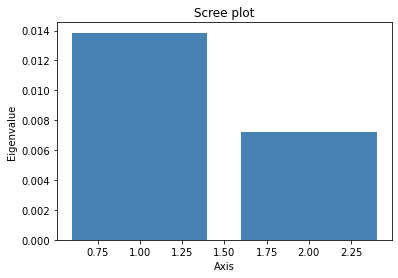

In [12]:
my_ca.plot_eigenvalues()

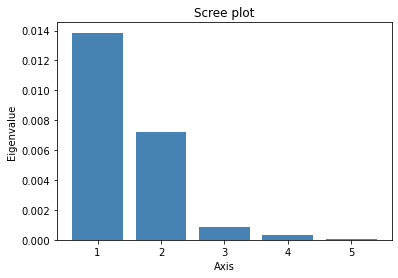

In [14]:
my_ca.plot_eigenvalues()

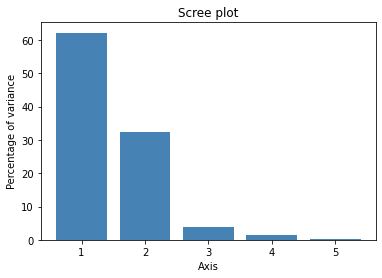

In [15]:
my_ca.plot_eigenvalues(type="percentage")

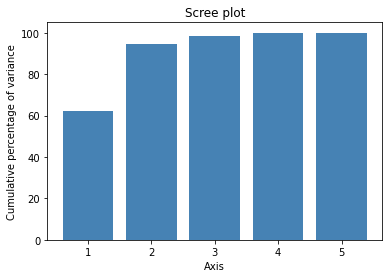

In [16]:
my_ca.plot_eigenvalues(type="cumulative")

<p>Quand l'objet <i>my\_ca</i> a été instancié, son paramètre <i>stats</i> a reçu la valeur True par défaut.<br />
En conséquence, lors de l'exécution de la méthode <i>my\_ca.fit(X)</i>, les statistiques suivantes ont été calculées :
<ul>
    <li><i>my\_ca.row\_contrib\_</i> : contributions des points lignes à la variance de l'axe</li>
    <li><i>my\_ca.col\_contrib\_</i> : contributions des points colonnes à la variance de l'axe</li>
    <li><i>my\_ca.row\_cos2\_</i> : cosinus carrés des points lignes</li>
    <li><i>my\_ca.col\_cos2\_</i> : cosinus carrés des points colonnes</li>
</ul>
</p>
<p>
Si l'on avait souhaité éviter le calcul de ces statistiques pour gagner du temps et économiser des ressources mémoire, il  aurait fallu instancier :<br />
my\_ca = CA(stats=False)
</p>
<p>
Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.<br />
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre <i>n_components</i> avec par exemple :<br />
my\_ca = CA(n_components=3)
</p>


<h3>Extraction des statistiques sur les points lignes</h3>

<h5>Export de la totalité des données lignes vers une DataFrame pandas</h5>
<p>On peut simplement envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>lignes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

1. _coord: coordonnées des variables pour créer un nuage de points
2. _cos2: qualité de représentation des variables.
3. _contrib: contributions (en pourcentage) des variables à la définition des dimensions.

Dans cette section, nous décrirons comment visualiser d'une part les individus et d'une autre part les catégories des variables. Ensuite, nous mettrons en évidence ces individus et variable en fonction soit de leurs qualités de représentation, soit de leurs contributions aux dimensions

In [17]:
df_rows = my_ca.row_topandas()

In [18]:
print(df_rows)

                row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Agriculteur           0.166150        0.309612       -0.071838   
Petit.Patr.           0.068377        0.143151       -0.064422   
Prof.Cad.Sup         -0.429976        0.060873       -0.003021   
Prof.Int.            -0.106603       -0.032597       -0.030898   
Employe               0.015729       -0.095469       -0.005087   
Ouvr.Qualif.          0.043713       -0.101379       -0.019323   
Ouvr.Non-Qual.        0.117797       -0.094864       -0.039728   
Inactif               0.032584        0.033395        0.025968   

                row_coord_dim4  row_coord_dim5  row_contrib_dim1  \
Agriculteur          -0.014433        0.021440          5.692772   
Petit.Patr.           0.020370       -0.025687          1.184762   
Prof.Cad.Sup          0.016811        0.011233         74.957901   
Prof.Int.            -0.025333       -0.011955          8.327911   
Employe              -0.020294        0.003462          0.267471 

<h5>Statistiques pour les points lignes</h5>

In [19]:
# Coordonnées des points lignes
print(my_ca.row_coord_)

[[ 0.16614986  0.30961174 -0.07183812 -0.01443258  0.02144011]
 [ 0.06837709  0.14315064 -0.0644217   0.02037032 -0.02568674]
 [-0.42997558  0.06087258 -0.00302124  0.01681116  0.01123318]
 [-0.10660251 -0.03259679 -0.03089814 -0.02533304 -0.01195531]
 [ 0.01572857 -0.09546893 -0.00508681 -0.02029446  0.00346168]
 [ 0.04371252 -0.1013786  -0.01932335  0.03541129 -0.00173011]
 [ 0.11779685 -0.09486419 -0.03972798  0.00349309  0.02248439]
 [ 0.0325837   0.03339524  0.02596802  0.00055285 -0.00093525]]


In [20]:
# Contributions des points lignes
print(my_ca.row_contrib_)

[[5.69277232e+00 3.79892214e+01 1.78813176e+01 1.95897194e+00
  1.58850001e+01]
 [1.18476189e+00 9.97925473e+00 1.76701383e+01 4.79537182e+00
  2.80180099e+01]
 [7.49579010e+01 2.88718751e+00 6.21822742e-02 5.22566729e+00
  8.57323474e+00]
 [8.32791077e+00 1.49641640e+00 1.17552426e+01 2.14482814e+01
  1.75522340e+01]
 [2.67471308e-01 1.89375750e+01 4.70061383e-01 2.03081396e+01
  2.17111555e+00]
 [1.53829776e+00 1.59009442e+01 5.05078817e+00 4.60393024e+01
  4.03817678e-01]
 [4.40539088e+00 5.49064526e+00 8.41929638e+00 1.76666131e-01
  2.68960553e+01]
 [3.62549412e+00 7.31875549e+00 3.86909733e+01 4.75993841e-02
  5.00532813e-01]]


In [21]:
# Cos2 des points lignes
print(my_ca.row_cos2_)

[[2.13511817e-01 7.41407219e-01 3.99146143e-02 1.61105251e-03
  3.55529749e-03]
 [1.53835147e-01 6.74249941e-01 1.36552219e-01 1.36530650e-02
  2.17096289e-02]
 [9.78183352e-01 1.96054203e-02 4.82951781e-05 1.49529881e-03
  6.67633606e-04]
 [8.02207290e-01 7.50069172e-02 6.73932587e-02 4.53029435e-02
  1.00895911e-02]
 [2.52142692e-02 9.28948989e-01 2.63729115e-03 4.19780929e-02
  1.22135734e-03]
 [1.38274790e-01 7.43744603e-01 2.70206674e-02 9.07433300e-02
  2.16610023e-04]
 [5.55680182e-01 3.60381228e-01 6.32048750e-02 4.88626636e-04
  2.02450881e-02]
 [3.72204454e-01 3.90975835e-01 2.36405913e-01 1.07151702e-04
  3.06646165e-04]]


<h3>Extraction des statistiques sur les points colonnes</h3>

<h5>Export de la totalité des données colonnes vers une DataFrame pandas</h5>
<p>On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>colonnes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [22]:
df_cols = my_ca.col_topandas()

In [23]:
print(df_cols)

            col_coord_dim1  col_coord_dim2  col_coord_dim3  col_coord_dim4  \
Radio            -0.014940       -0.022106       -0.046702       -0.002662   
Tel.              0.053283       -0.002081        0.016453        0.011218   
Quot.Nat.        -0.540675        0.006207        0.020542        0.039523   
Quot.Reg.         0.108828        0.109645        0.005228        0.013042   
Press.Mag.       -0.094813        0.132497        0.018758       -0.038309   
Press.TV          0.009754       -0.161609        0.027141       -0.014518   

            col_coord_dim5  col_contrib_dim1  col_contrib_dim2  \
Radio             0.000680          0.428700          1.803681   
Tel.              0.009850          6.564128          0.019242   
Quot.Nat.        -0.006617         74.587719          0.018890   
Quot.Reg.        -0.016560         11.501128         22.435641   
Press.Mag.        0.003719          6.823338         25.608027   
Press.TV         -0.009147          0.094987         50.1

<h5>Statistiques pour les points colonnes</h5>

In [24]:
# Coordonnées des points colonnes
print(my_ca.col_coord_)

[[-0.01494022 -0.02210596 -0.04670175 -0.00266194  0.00068016]
 [ 0.05328288 -0.002081    0.01645288  0.0112183   0.00985007]
 [-0.54067502  0.00620677  0.02054203  0.03952278 -0.00661745]
 [ 0.10882837  0.10964537  0.00522829  0.01304161 -0.01656044]
 [-0.09481257  0.13249659  0.01875847 -0.03830946  0.0037189 ]
 [ 0.00975363 -0.16160888  0.02714057 -0.01451757 -0.00914728]]


In [25]:
# Contributions des points colonnes
print(my_ca.col_contrib_)

[[4.28700199e-01 1.80368136e+00 7.03836037e+01 6.20658916e-01
  1.48890251e-01]
 [6.56412758e+00 1.92419243e-02 1.05160124e+01 1.32700380e+01
  3.75915100e+01]
 [7.45877189e+01 1.88897960e-02 1.80903503e+00 1.81763356e+01
  1.87234094e+00]
 [1.15011283e+01 2.24356413e+01 4.46006948e-01 7.53243787e+00
  4.46282147e+01]
 [6.82333790e+00 2.56080275e+01 4.48771875e+00 5.08035174e+01
  1.75915503e+00]
 [9.49870405e-02 5.01145182e+01 1.23576232e+01 9.59701224e+00
  1.39998891e+01]]


In [26]:
# Cos2 des points colonnes
print(my_ca.col_cos2_)

[[7.69561735e-02 1.68479830e-01 7.51961487e-01 2.44301514e-03
  1.59494851e-04]
 [8.50792093e-01 1.29775661e-03 8.11207283e-02 3.77139463e-02
  2.90754756e-02]
 [9.92981084e-01 1.30857685e-04 1.43335889e-03 5.30595256e-03
  1.48747339e-04]
 [4.86642767e-01 4.93976885e-01 1.12317070e-03 6.98857711e-03
  1.12685999e-02]
 [3.16773320e-01 6.18623139e-01 1.23997140e-02 5.17164707e-02
  4.87356154e-04]
 [3.49195247e-03 9.58662728e-01 2.70379173e-02 7.73612354e-03
  3.07127840e-03]]


<h3>Graphiques</h3>

<p>
2 types de graphiques peuvent être réalisés :
<ul>
    <li>Les mapping classiques qui représentent les points lignes et colonnes sur un plan factoriel</li>
    <li>Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel (le 1er axe dans notre exemple) et on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe</li>
</ul>
</p>
<h5>Graphiques factoriels</h5>

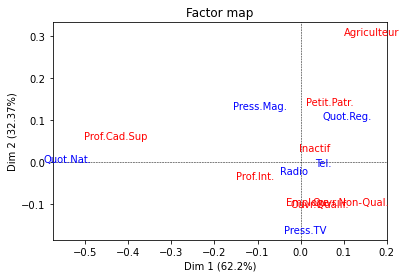

In [27]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_ca.mapping(num_x_axis=1, num_y_axis=2)

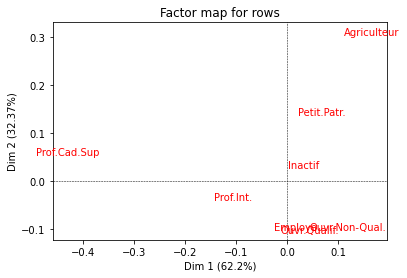

In [28]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)

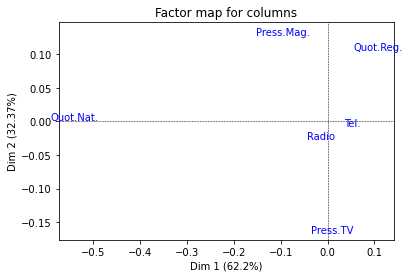

In [29]:
# Mapping des points colonnes
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)

<h5>Analyse du 1er axe - Points lignes</h5>

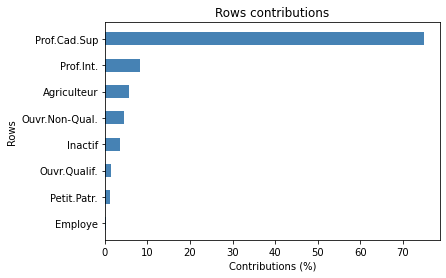

In [30]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)

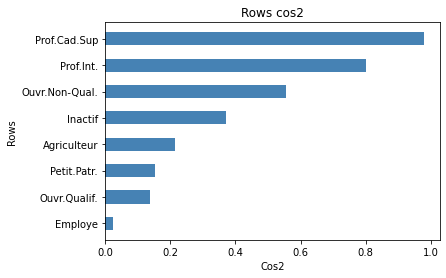

In [31]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_ca.plot_row_cos2(num_axis=1)

<h5>Analyse du 1er axe - Points colonnes</h5>

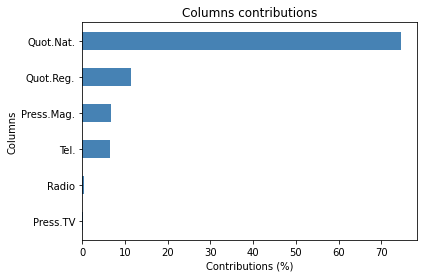

In [32]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_ca.plot_col_contrib(num_axis=1)

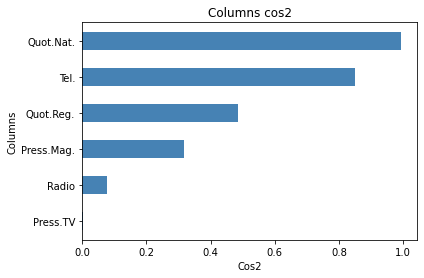

In [33]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_ca.plot_col_cos2(num_axis=1)

Pour tous les graphiques présentés plus haut, il est possible de définir un taille particulière via le paramètre <i>figsize</i>.

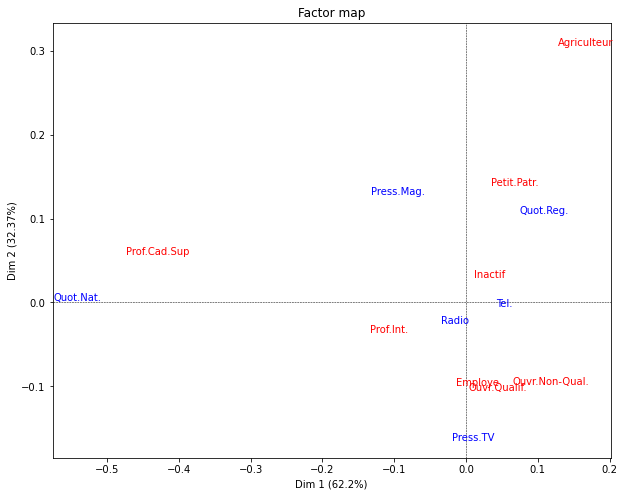

In [34]:
my_ca.mapping(1, 2, figsize=(10, 8))

<h3>Projection de points lignes supplémentaires</h3>

<p>La classe CA implémente les méthodes fit, transform et fit_transform bien connues des utilisateurs de scikit-learn.</p>
<p>Ces méthodes vont nous permettre de projetter des points lignes sur les axes factoriels.</p>
<p>Il est ici judicieux de fixer le paramètre stats à False pour gagner en temps de traitement et en ressources mémoire.</p>

In [35]:
my_ca = CA(stats=False)

In [36]:
# Estimation du modèle
my_ca.fit(X)

CA(stats=False)

In [37]:
# Projection de l'ensemble des points lignes sur les axes factoriels
my_ca.transform(X)

array([[ 0.16614986,  0.30961174, -0.07183812, -0.01443258,  0.02144011],
       [ 0.06837709,  0.14315064, -0.0644217 ,  0.02037032, -0.02568674],
       [-0.42997558,  0.06087258, -0.00302124,  0.01681116,  0.01123318],
       [-0.10660251, -0.03259679, -0.03089814, -0.02533304, -0.01195531],
       [ 0.01572857, -0.09546893, -0.00508681, -0.02029446,  0.00346168],
       [ 0.04371252, -0.1013786 , -0.01932335,  0.03541129, -0.00173011],
       [ 0.11779685, -0.09486419, -0.03972798,  0.00349309,  0.02248439],
       [ 0.0325837 ,  0.03339524,  0.02596802,  0.00055285, -0.00093525]])

In [38]:
# Idem en une seule étape
my_ca.fit_transform(X)

array([[ 0.16614986,  0.30961174, -0.07183812, -0.01443258,  0.02144011],
       [ 0.06837709,  0.14315064, -0.0644217 ,  0.02037032, -0.02568674],
       [-0.42997558,  0.06087258, -0.00302124,  0.01681116,  0.01123318],
       [-0.10660251, -0.03259679, -0.03089814, -0.02533304, -0.01195531],
       [ 0.01572857, -0.09546893, -0.00508681, -0.02029446,  0.00346168],
       [ 0.04371252, -0.1013786 , -0.01932335,  0.03541129, -0.00173011],
       [ 0.11779685, -0.09486419, -0.03972798,  0.00349309,  0.02248439],
       [ 0.0325837 ,  0.03339524,  0.02596802,  0.00055285, -0.00093525]])

In [39]:
# Projection d'une ligne supplémentaire
my_ca.transform([[25, 54, 41, 11, 65, 44]])

array([[-0.85659025,  0.11271178,  0.44021711, -0.19738323, -0.02993141]])

<p>Les méthodes <i>transform</i> et <i>fit_transform</i> ne sont pas forcément très utiles dans le cadre de l'Analyse Factorielle des Correspondances simple.</p>
<p>En revanche, elles seront beaucoup plus intéressantes dans le cadre de l'Analyse des Correspondances Multiples et de l'Analyse en Composantes Principales, et les tutoriels relatifs à ces méthodes essaieront de l'illustrer.</p>